In [1]:
%matplotlib inline
from sqlalchemy import func, inspect
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [27]:
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta 

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
Base = automap_base()
Base.prepare(autoload_with=engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [60]:
inspector = inspect(engine)

columns = inspector.get_columns('measurement')

for column in columns:
    print(column["name"], column["type"])
    
# Find the most recent date in the data set.
end_date_str = session.query(func.max(measurement.date)).scalar()
end_date_str


    


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


'2017-08-23'

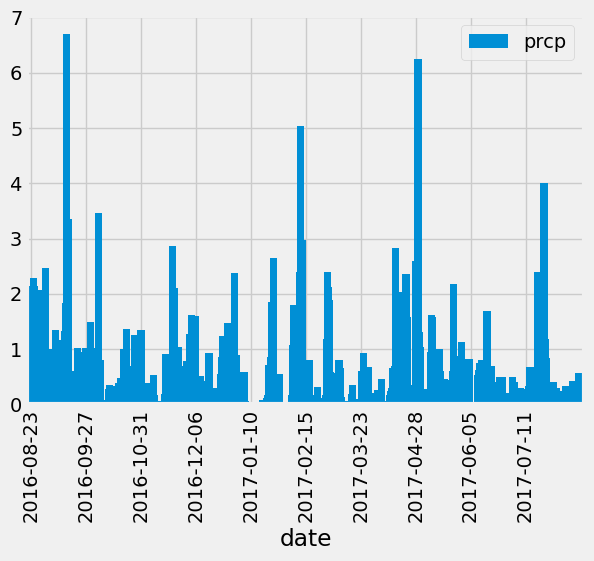

In [29]:
end_date = datetime.strptime(end_date_str, "%Y-%m-%d").date()

    
start_date = end_date - relativedelta(years = 1)


qry = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date.between(start_date, end_date)).\
    order_by(measurement.date)

results = qry.all()

df = pd.DataFrame(results, columns=["date", "prcp"])
df = df.set_index("date")
df.plot.bar(width=30)
plt.locator_params(axis='x', nbins=10)
plt.show()




# Exploratory Station Analysis

In [59]:
# Design a query to calculate the total number of stations in the dataset

# inspector = inspect(engine)

# columns = inspector.get_columns('station')
# for column in columns:
#     print(column["name"], column["type"])
    
station_count = session.query(station).count()

station_count
    

9

In [41]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

station_obsrv = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc())

for obv in station_obsrv:
    print(obv)



('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [64]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(measurement.tobs).filter(measurement.station == "USC00519281")

results = most_active.all()

df = pd.DataFrame(results)
df.agg(["min", "max", "mean"])


# id INTEGER
# station TEXT
# date TEXT
# prcp FLOAT
# tobs FLOAT

tobs
0     70.0
1     62.0
2     74.0
3     75.0
4     74.0
...    ...
2767  77.0
2768  77.0
2769  76.0
2770  76.0
2771  79.0

[2772 rows x 1 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

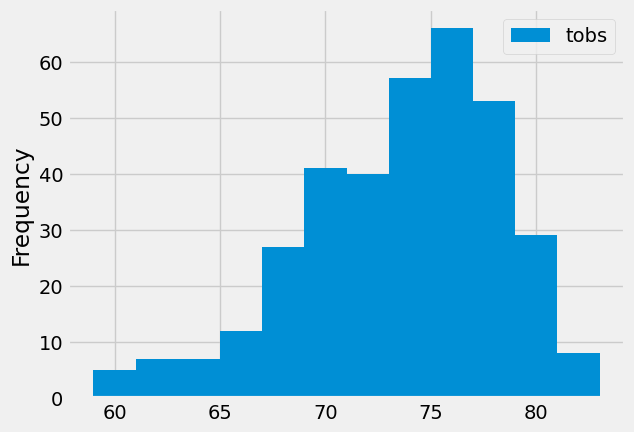

In [67]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
qry = session.query(measurement.tobs).\
    filter(
        measurement.station == "USC00519281",
        measurement.date.between(start_date, end_date)
    )

results = qry.all()
df = pd.DataFrame(results)
df.plot.hist(bins=12)
plt.show




# Close Session

In [68]:
# Close Session
session.close()